#### Optional Code for runnin in Collab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os

# Path to your project folder in Drive
project_path = '/content/drive/MyDrive/WASL-translator'

# Change working directory
os.chdir(project_path)

# Confirm structure
print("Current working dir:", os.getcwd())
!ls -R data/raw | head -20

##### For pulling new changes

In [ ]:
!cd /content/drive/MyDrive/WASL-translator && git pull

### Load the dataset 
Loaded from .../data/raw/

In [19]:
# Import dataset loader
import sys, os
sys.path.append(os.path.abspath("../src"))
from utils import dataset_loader
import importlib
importlib.reload(dataset_loader)

X_train, y_train, X_test, y_test = dataset_loader.load_dataset("../data/raw", debug=True)


📂 Loading A...
📂 Loading B...
📂 Loading C...
📂 Loading D...
📂 Loading del...
📂 Loading E...
📂 Loading F...
📂 Loading G...
📂 Loading H...
📂 Loading I...
📂 Loading J...
📂 Loading K...
📂 Loading L...
📂 Loading M...
📂 Loading N...
📂 Loading nothing...
📂 Loading O...
📂 Loading P...
📂 Loading Q...
📂 Loading R...
📂 Loading S...
📂 Loading space...
📂 Loading T...
📂 Loading U...
📂 Loading V...
📂 Loading W...
📂 Loading X...
📂 Loading Y...
📂 Loading Z...
Loaded 87000 training images across 29 classes.
Loaded 28 test images across 28 labels.
Loaded dataset_loader from: e:\Ashwin\importantFiles\Programming Projects\WASL-translator\src\utils\dataset_loader.py
Train label set: ['a', 'b', 'c', 'd', 'del', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'nothing', 'o', 'p', 'q', 'r', 's', 'space', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Test label set: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'nothing', 'o', 'p', 'q', 'r', 's', 'space', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Unsee

In [12]:
# Import dataset loader
import sys, os
sys.path.append(os.path.abspath("../src"))

from utils.dataset_loader import load_dataset

# Load raw data
root_dir = "../data/raw"
X_train, y_train, X_test, y_test = load_dataset(root_dir)


Loading A...
Loading B...
Loading C...
Loading D...
Loading E...
Loading F...
Loading G...
Loading H...
Loading I...
Loading J...
Loading K...
Loading L...
Loading M...
Loading N...
Loading O...
Loading P...
Loading Q...
Loading R...
Loading S...
Loading T...
Loading U...
Loading V...
Loading W...
Loading X...
Loading Y...
Loading Z...
Loading del...
Loading nothing...
Loading space...
Loaded 87000 training images across 29 classes.
Loaded 28 test images across 28 classes.
Dataset loaded successfully!


### Preprocess data

In [20]:
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder

def preprocess_images(images, target_size=(64, 64), grayscale=True):
    processed = []
    for img in images:
        # Resize to 64x64 pixels square using weighted average
        img = cv2.resize(img, target_size)

        # Convert to grayscale to save space and reduce complexity
        if grayscale:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = np.expand_dims(img, axis=-1)

        # Normalize pixel values to [0, 1]
        img = img.astype("float32") / 255.0

        processed.append(img)
    return np.array(processed)

# Give labels numerical values
def encode_labels(labels):
    encoder = LabelEncoder()
    encoded = encoder.fit_transform(labels)
    return encoded, encoder


In [21]:
# Process images
X_train_prep = preprocess_images(X_train, target_size=(64, 64))
X_test_prep = preprocess_images(X_test, target_size=(64, 64))

# Encode labels
y_train_enc, label_encoder = encode_labels(y_train)
y_test_enc = label_encoder.transform(y_test)

print("Preprocessing complete!")
print("X_train shape:", X_train_prep.shape)
print("y_train shape:", y_train_enc.shape)


Preprocessing complete!
X_train shape: (87000, 64, 64, 1)
y_train shape: (87000,)


### Save processed data and Show example imgs
Saved into: .../data/processed/

In [22]:
import joblib
import numpy as np
import os

os.makedirs("../data/processed", exist_ok=True)

np.save("../data/processed/X_train.npy", X_train_prep)
np.save("../data/processed/X_test.npy", X_test_prep)
joblib.dump(label_encoder, "../data/processed/label_encoder.pkl")

print("Preprocessed data saved!")


Preprocessed data saved!


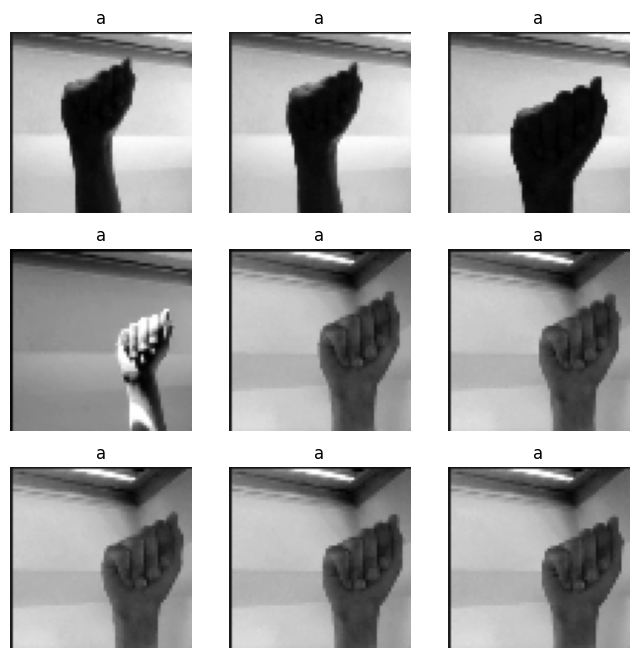

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train_prep[i].squeeze(), cmap="gray")
    plt.title(label_encoder.inverse_transform([y_train_enc[i]])[0])
    plt.axis("off")
plt.show()
